In [1]:
%pylab inline
rc('font', size=14)
import pybf as bf
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


### Initialize VexCL context.
And also see what devices we are running on:

In [2]:
bf.context()

1. GeForce 840M



### Load Mario's dataset

In [3]:
neuron_data = genfromtxt('/home/demidov/Desktop/TinyTestSet/neurontable.txt', names=True, delimiter=',')
init_cond = genfromtxt('/home/demidov/Desktop/TinyTestSet/IC_table.txt', names=True, delimiter=',')

n_neurons = neuron_data.shape[0]

### Create initial state as a numpy array of size 14 x n_neurons
And fill it with Mario's data.

In [4]:
S = empty((14,n_neurons))

S[bf.V_DEND]  = init_cond['V_dend']
S[bf.V_SOMA]  = init_cond['V_soma']
S[bf.V_AXON]  = init_cond['V_axon']
S[bf.R_D]     = init_cond['Calcium_r']
S[bf.Z_D]     = init_cond['Potassium_s']
S[bf.N_D]     = init_cond['Hcurrent_q']
S[bf.CA_CONC] = init_cond['Ca2Plus']
S[bf.K_S]     = init_cond['Calcium_k']
S[bf.L_S]     = init_cond['Calcium_l']
S[bf.H_S]     = init_cond['Sodium_h']
S[bf.N_S]     = init_cond['Potassium_n']
S[bf.X_S]     = init_cond['Potassium_x_s']
S[bf.H_A]     = init_cond['Sodium_h_a']
S[bf.X_A]     = init_cond['Potassium_x_a']

### Create stepper object
Set the neuron's parameters from Mario's data:

In [5]:
stepper = bf.neuron_system(n_neurons)

stepper.set_g_leak_d(neuron_data['g_ld'].copy())
stepper.set_g_leak_s(neuron_data['g_ls'].copy())
stepper.set_g_leak_a(neuron_data['g_la'].copy())
stepper.set_g_kca_d(neuron_data['g_K_Ca'].copy())
stepper.set_g_cah_d(neuron_data['g_CaH'].copy())
stepper.set_g_h_d(neuron_data['g_h'].copy())

### Advance the system in time
Gather some historical data in the process, we will plot it later:

In [6]:
# History size (steps), number of time steps to do between each check point (wsteps), and time step size:
steps, wsteps, dt = 200, 2, 0.05

# Numbers of neurons to save (and later plot) data for:
plot_neurons = [10, 35, 37, 100]

# The array that will hold V_axon history:
v_axon = empty((len(plot_neurons),steps+1)); v_axon[:,0] = S[bf.V_AXON,plot_neurons]

# Advance!
for i in tqdm(range(steps)):
    # Input variable:
    Iapp = 1 if (i >= 150 and i < 160) else 0
    
    stepper.advance(S, wsteps, dt, Iapp)

    v_axon[:,i+1] = S[bf.V_AXON,plot_neurons]

100%|██████████| 200/200 [00:00<00:00, 2169.57it/s]


### Plot the results

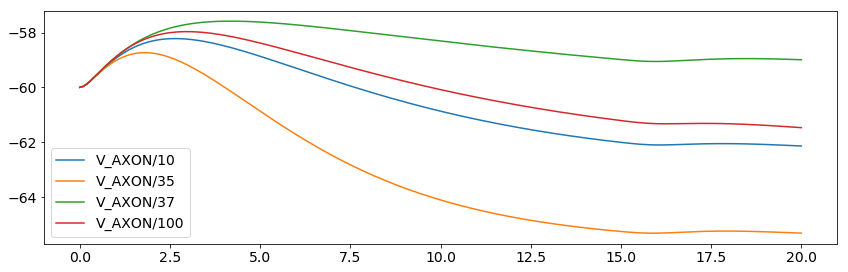

In [7]:
figure(figsize=(12,4))
time = wsteps * dt * arange(steps+1)
for i,n in enumerate(plot_neurons):
    plot(time, v_axon[i], label='V_AXON/{}'.format(n))
legend()
tight_layout()